In [26]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime
import seaborn as sns
import statsmodels.api as sm 
from statsmodels import regression
from scipy import stats
%matplotlib inline

yf.pdr_override()

start_i = '2017-01-01'

bova11 = yf.download('BOVA11.SA', start=start_i, parse_dates=True)
vale3 = yf.download('VALE3.SA', start=start_i, parse_dates=True)
b3sa3 = yf.download('B3SA3.SA', start=start_i, parse_dates=True)
itub4 = yf.download('ITUB4.SA', start=start_i, parse_dates=True)
petr4 = yf.download('PETR4.SA', start=start_i, parse_dates=True)
bbdc4 = yf.download('BBDC4.SA', start=start_i, parse_dates=True)
petr3 = yf.download('PETR3.SA', start=start_i, parse_dates=True)
abev3 = yf.download('ABEV3.SA', start=start_i, parse_dates=True)
mglu3 = yf.download('MGLU3.SA', start=start_i, parse_dates=True)
bbsa3 = yf.download('BBAS3.SA', start=start_i, parse_dates=True)
itsa4 = yf.download('ITSA4.SA', start=start_i, parse_dates=True)

tickers_dict =[bova11, vale3, b3sa3, itub4, petr4,
               bbdc4, petr3, abev3, mglu3, bbsa3, itsa4]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
bova11.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-14,95.099998,96.870003,94.620003,96.599998,96.599998,9503620
2020-07-15,97.699997,98.339996,96.930000,98.029999,98.029999,13982380
2020-07-16,97.550003,97.800003,96.459999,96.820000,96.820000,6110460
2020-07-17,97.419998,99.250000,97.419998,99.129997,99.129997,5621400
2020-07-20,99.120003,100.599998,98.879997,100.500000,100.500000,8563550
2020-07-21,101.230003,101.360001,99.849998,100.290001,100.290001,5261760
2020-07-22,100.570000,101.150002,99.389999,100.379997,100.379997,6524500
2020-07-23,100.379997,101.059998,98.269997,98.400002,98.400002,7849280
2020-07-24,98.300003,98.930000,97.089996,98.589996,98.589996,9457090


- iShares Ibovespa Fundo de Índice (BOVA11)

- (1) - VALE3 (10.26%)
- (2) - B3SA3 (7.11%)
- (3) - ITUB4 (6.67%)

- = 24.04 % (24/07/2020)



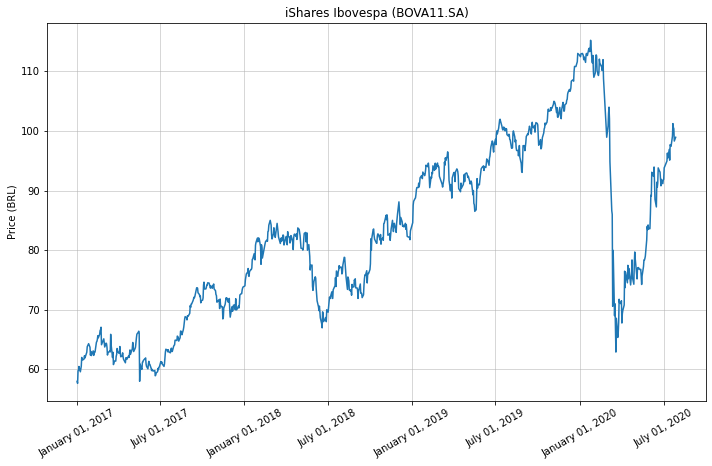

In [28]:
# Plotting iShares Ibovespa (BOVA11.SA): 

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(bova11.index, bova11.Open, linestyle='-')

plt.ylabel('Price (BRL)')
plt.title('iShares Ibovespa (BOVA11.SA)')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

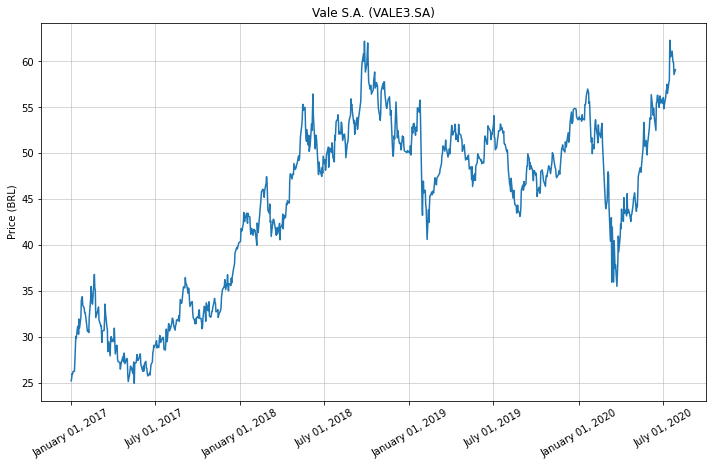

In [29]:
# Plotting Vale S.A. (VALE3.SA):

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(vale3.index, vale3.Open, linestyle='-')
plt.title('Vale S.A. (VALE3.SA)')
plt.ylabel('Price (BRL)')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

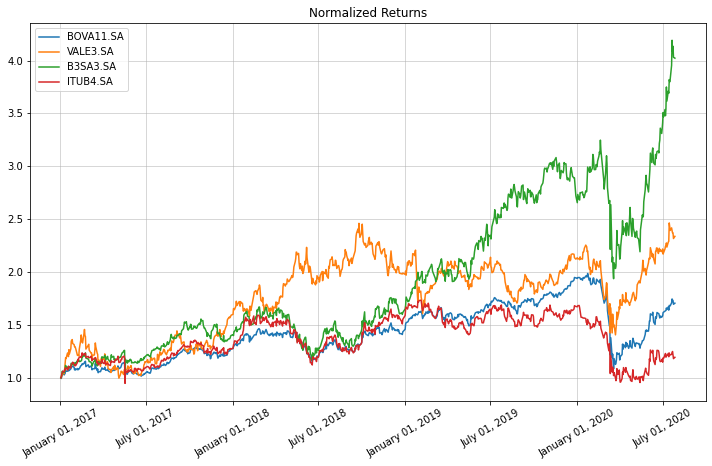

In [30]:
# Normalized comparison

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(bova11.index, bova11.Open/bova11.Open[0], label='BOVA11.SA', linestyle='-')
plt.plot(vale3.index, vale3.Open/vale3.Open[0], label='VALE3.SA', linestyle='-')
plt.plot(b3sa3.index, b3sa3.Open/b3sa3.Open[0], label='B3SA3.SA', linestyle='-')
plt.plot(itub4.index, itub4.Open/itub4.Open[0], label='ITUB4.SA', linestyle='-')

plt.title('Normalized Returns')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

In [31]:
# Creating DataFrame with opening prices:

my_dict_2 = {'BOVA11': bova11.Open, 'VALE3': vale3.Open, 
             'B3SA3': b3sa3.Open, 'ITUB4': itub4.Open, 'PETR4': petr4.Open, 
             'BBDC4': bbdc4.Open, 'PETR3': petr4.Open, 'ABEV3': abev3.Open, 
             'MGLU3': mglu3.Open, 'BBSA3': bbsa3.Open, 'ITSA4': itsa4.Open}

df_main = pd.DataFrame(my_dict_2)

for key, item in df_main.items():
    r_col_name = str(key) + ('_PctChange')
    returns = item.pct_change()[1:]
    df_main[r_col_name] = returns

df_main.tail()

,BOVA11,VALE3,B3SA3,ITUB4,PETR4,BBDC4,PETR3,ABEV3,MGLU3,BBSA3,...,VALE3_PctChange,B3SA3_PctChange,ITUB4_PctChange,PETR4_PctChange,BBDC4_PctChange,PETR3_PctChange,ABEV3_PctChange,MGLU3_PctChange,BBSA3_PctChange,ITSA4_PctChange
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-21,101.230003,60.439999,68.150002,27.600000,23.150000,23.000000,23.150000,14.18,88.709999,35.750000,...,-0.011126,0.059876,0.012844,0.019824,0.024043,0.019824,0.004961,0.077101,0.007326,0.019417
2020-07-22,100.570000,59.930000,66.449997,27.850000,23.299999,23.299999,23.299999,14.65,84.000000,35.650002,...,-0.008438,-0.024945,0.009058,0.006479,0.013043,0.006479,0.033145,-0.053094,-0.002797,0.006667
2020-07-23,100.379997,59.900002,67.230003,27.100000,23.160000,22.889999,23.160000,14.71,85.080002,35.259998,...,-0.000501,0.011738,-0.026930,-0.006009,-0.017597,-0.006009,0.004096,0.012857,-0.010940,-0.003784
2020-07-24,98.300003,58.570000,65.540001,26.350000,22.540001,22.299999,22.540001,14.49,79.879997,34.000000,...,-0.022204,-0.025138,-0.027675,-0.026770,-0.025775,-0.026770,-0.014956,-0.061119,-0.035734,-0.018993
2020-07-27,98.930000,59.099998,65.400002,26.629999,22.870001,22.889999,22.870001,14.93,80.650002,33.700001,...,0.009049,-0.002136,0.010626,0.014641,0.026457,0.014641,0.030366,0.009640,-0.008824,0.013553


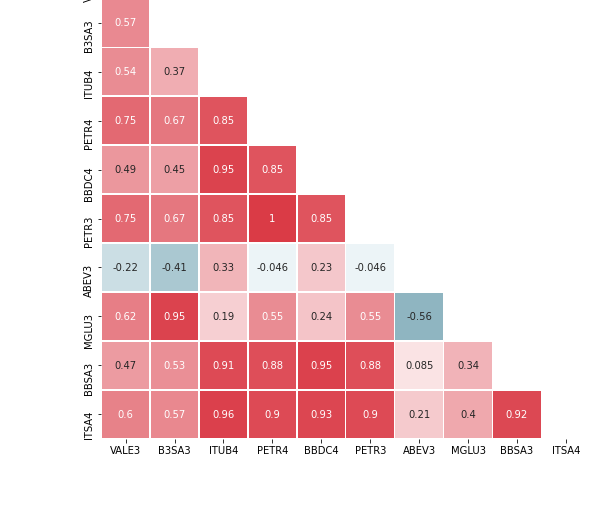

In [32]:
# Create correlation matrix: 

correl = df_main.iloc[:, 1:11].corr()

# Create Mask for upper triangle: 

mask = np.triu(np.ones_like(correl, dtype=np.bool))

# Set Matplotlib Figure: 

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap: 

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask with the correct aspect ratio:

sns.heatmap(correl, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot=True )

plt.show()

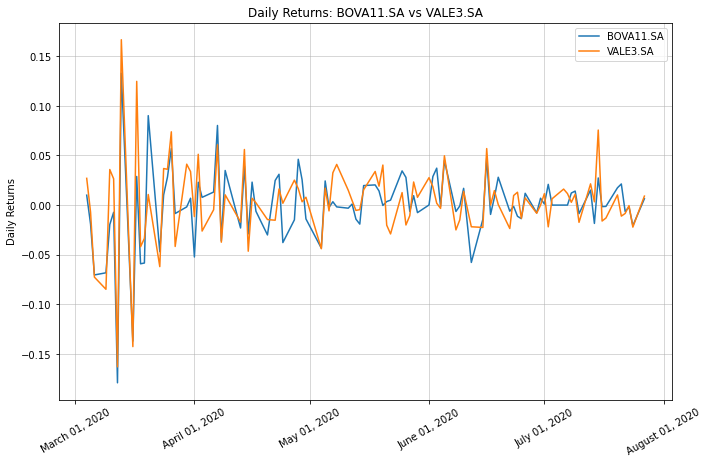

In [33]:
# BOVA11.SA vs VALE3.SA:

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

n_days = 100

plt.plot(df_main.index[-n_days:], df_main.BOVA11_PctChange[-n_days:], label='BOVA11.SA', linestyle='-')
plt.plot(df_main.index[-n_days:], df_main.VALE3_PctChange[-n_days:], label='VALE3.SA', linestyle='-')

plt.title('Daily Returns: BOVA11.SA vs VALE3.SA')
plt.ylabel('Daily Returns')

plt.grid(linewidth=0.5)
plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

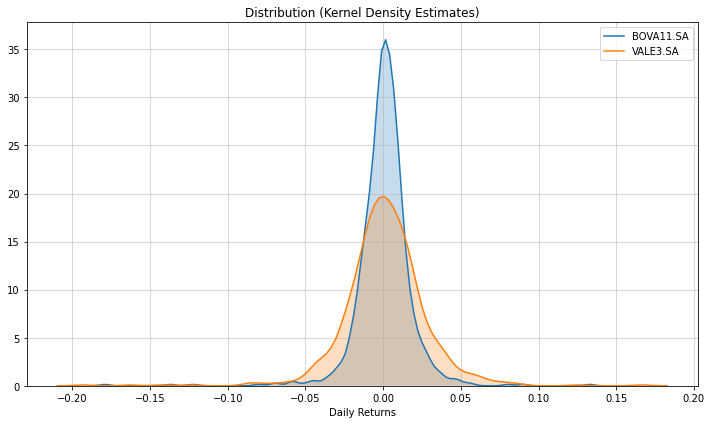

In [34]:
# Distributions:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_main.BOVA11_PctChange, label='BOVA11.SA' , shade=True, linestyle='-')
sns.kdeplot(data=df_main.VALE3_PctChange, label='VALE3.SA', shade=True, linestyle='-')

plt.title('Distribution (Kernel Density Estimates)')
plt.xlabel('Daily Returns')

plt.grid(linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

- Technical Indicator: Moving Average/Rolling Mean

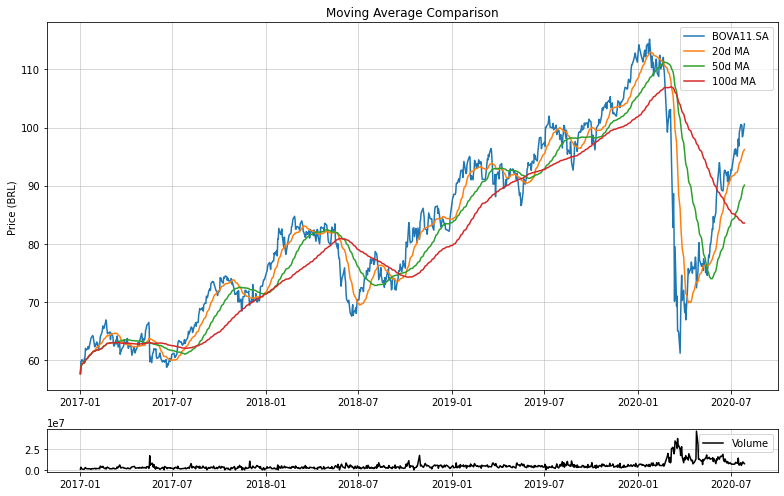

In [36]:
# Calculating 20, 50, 100 day moving average:

df_adj_close = {}

df_adj_close['20ma'] = bova11['Adj Close'].rolling(window=20, min_periods=0).mean()
df_adj_close['50ma'] = bova11['Adj Close'].rolling(window=50, min_periods=0).mean()
df_adj_close['100ma'] = bova11['Adj Close'].rolling(window=100, min_periods=0).mean()

plt.figure(figsize=(11, 7))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(bova11.index, bova11['Adj Close'], label='BOVA11.SA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['20ma'], label='20d MA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['50ma'], label='50d MA', linestyle='-')
ax1.plot(bova11.index, df_adj_close['100ma'], label='100d MA', linestyle='-')

ax2.plot(bova11.index, bova11.Volume,color='k', label='Volume', linestyle='-')

ax1.set_ylabel('Price (BRL)')
ax1.set_title('Moving Average Comparison')

ax1.legend()
ax2.legend()

ax1.grid(linewidth=0.5)
ax2.grid(linewidth=0.5)

plt.tight_layout()
plt.show()


- Application: Machine Learning
- Can we find the best MA?
- Credits to G.Malato: ('https://github.com/gianlucamalato/machinelearning/blob/master/Find_the_best_moving_average.ipynb')